## Notebook for imaging eMERLIN calibrated data

This illustrates how ARL may be used to image eMERLIN data. The example data is from:

http://www.e-merlin.ac.uk/distribute/support/tutorials/3C277.1_20150505.tar

For a summary of the images produced by the eMERLIN CASA pipeline see:

 http://www.e-merlin.ac.uk/distribute/support/tutorials/3C277.1_20150505/weblog/index.html
 
 To run this, you will need:
 
 - ARL from branch feature-eMERLIN-support
 - The data from above
 - nifty-gridder from https://gitlab.mpcdf.mpg.de/ift/nifty_gridder
 

In [1]:
%matplotlib inline

import logging
import sys
import os

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['image.cmap'] = 'rainbow'

import numpy

from processing_components.image.operations import show_image, qa_image, export_image_to_fits
from processing_components.calibration.operations import qa_gaintable
from processing_components.visibility.base import create_blockvisibility_from_ms, list_ms

cwd = os.getcwd()

log = logging.getLogger()
log.setLevel(logging.INFO)
log.addHandler(logging.FileHandler('%s/eMERLIN_imaging.log' % cwd))

logging.basicConfig(filename='%s/eMERLIN_imaging.log' % cwd,
                    filemode='w',
                    format='%(date)s %(asctime)s.%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.DEBUG)
log.info("Logging to %s/eMERLIN_imaging.log" % cwd)


#### List the contents of the MeasurementSet: sources and data descriptors

In [2]:
print(list_ms('../../data/3C277.1_avg.ms'))

(['1302+5748', '0319+415', '1407+284', '1252+5634', '1331+305'], [0, 1, 2, 3])


#### Load just 3C277.1 (1252+5634) and '1302+5748'

In [3]:
selected_sources = ['1302+5748', '1252+5634']
bvis_list = create_blockvisibility_from_ms('../../data/3C277.1_avg.ms', datacolumn='CORRECTED_DATA',
                                           selected_sources=selected_sources)
sources = numpy.unique([bv.source for bv in bvis_list])
print(sources)

['1252+5634' '1302+5748']


#### Average across all each BlockVisibility over all 128 channels, and then concatenate into single BlockVisibilitys, one per source

In [4]:
from processing_components.visibility.operations import integrate_visibility_by_channel, \
    concatenate_blockvisibility_frequency
avis_list = [integrate_visibility_by_channel(bvis) for bvis in bvis_list]
blockvis = [concatenate_blockvisibility_frequency(avis_list[isource * 4:(isource * 4 + 4)])
            for isource, source in enumerate(sources)]

#### Plot the uv coverage and visibility

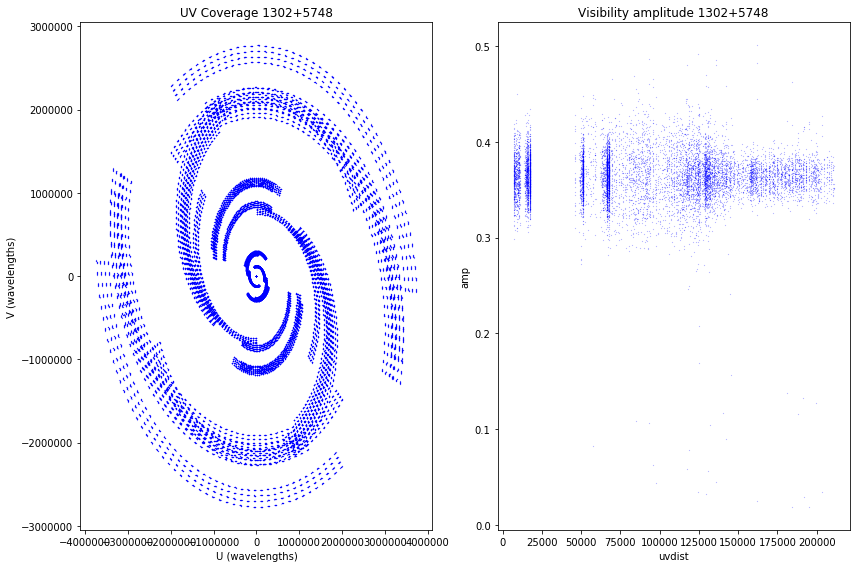

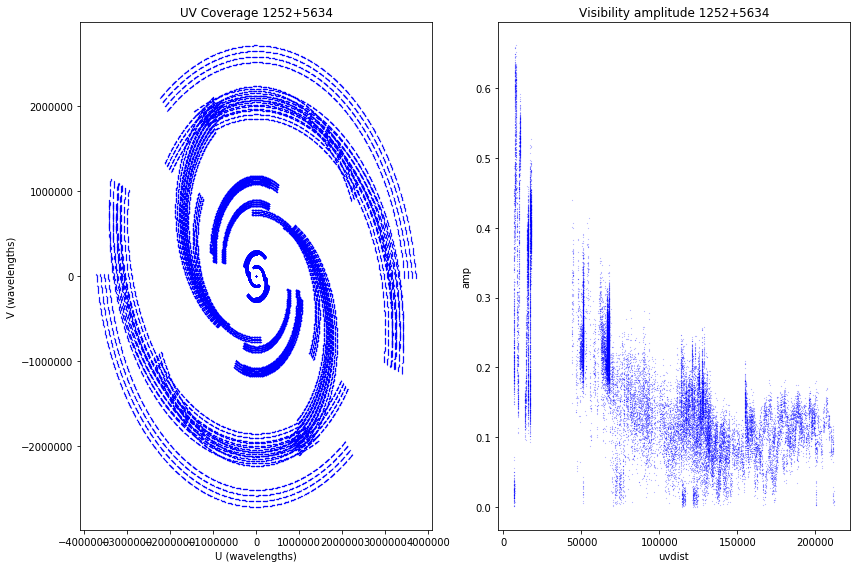

In [8]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.cmap'] = 'rainbow'

from processing_components.simulation.simulation_helpers import plot_uvcoverage, plot_visibility

for svis in blockvis:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    plot_uvcoverage([svis], ax=ax[0], title='UV Coverage {source:s}'.format(source=svis.source))
    plot_visibility([svis], ax=ax[1], title='Visibility amplitude {source:s}'.format(source=svis.source))
    plt.tight_layout()
    plt.show(block=False)
    

#### Run one of:
- Invert + deconvolve + restore (mode='invert')
- Continuum Imaging Pipeline (mode='cip')
- ICAL pipeline (mode='ical')



Processing 1302+5748 via cip pipeline




Quality assessment:
	Origin: qa_image
	Context: Deconvolved image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.06843858600436663'
		min: '-0.004327548205034375'
		maxabs: '0.06843858600436663'
		rms: '9.96090538322021e-05'
		sum: '0.38427954439178685'
		medianabs: '0.0'
		medianabsdevmedian: '0.0'
		median: '0.0'



<Figure size 864x864 with 0 Axes>

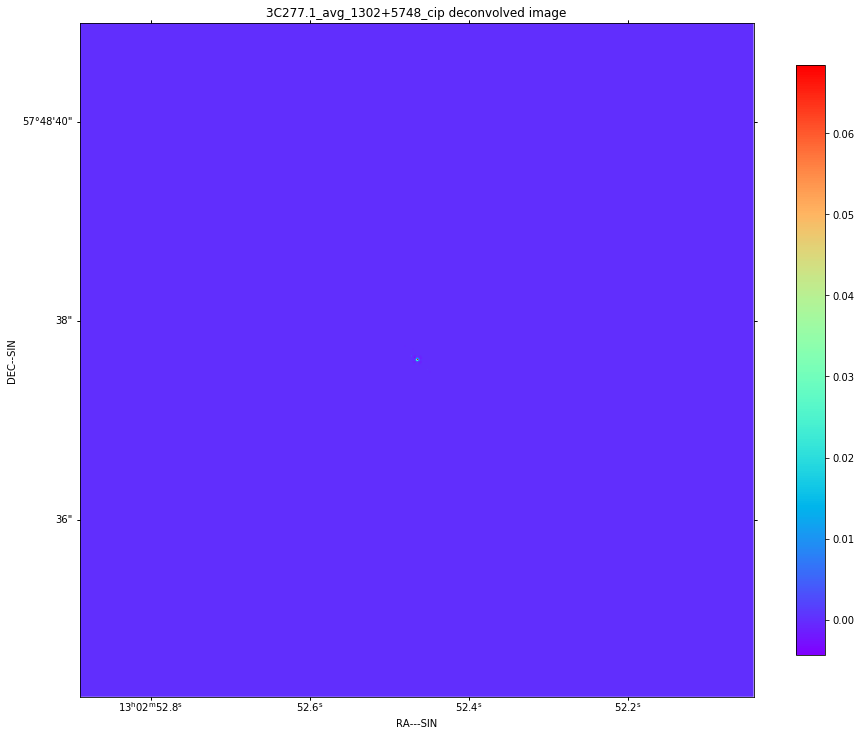

Quality assessment:
	Origin: qa_image
	Context: Residual image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.0021362202242016792'
		min: '-0.0021382966078817844'
		maxabs: '0.0021382966078817844'
		rms: '0.000528242129244463'
		sum: '0.26105664568565834'
		medianabs: '0.00036293106677476317'
		medianabsdevmedian: '0.0003629254351835698'
		median: '2.1105921632624813e-06'



<Figure size 864x864 with 0 Axes>

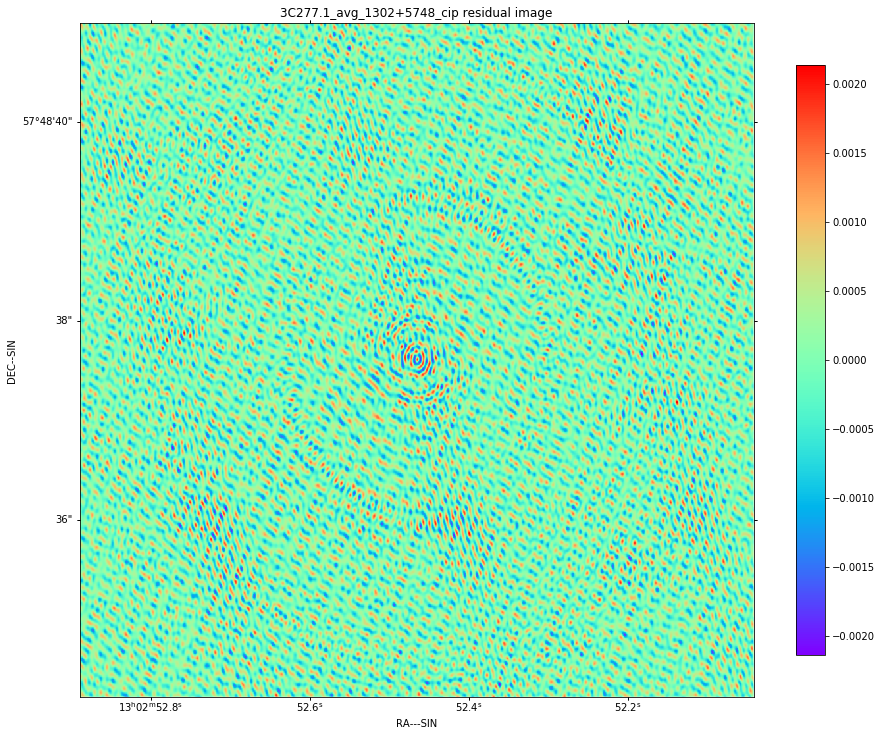

Quality assessment:
	Origin: qa_image
	Context: Restored image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.37638076252217684'
		min: '-0.003081856474426648'
		maxabs: '0.37638076252217684'
		rms: '0.0023612758313786516'
		sum: '29.372842410093025'
		medianabs: '0.0003631838917499406'
		medianabsdevmedian: '0.00036315152829047325'
		median: '2.4702542305023812e-06'



<Figure size 864x864 with 0 Axes>

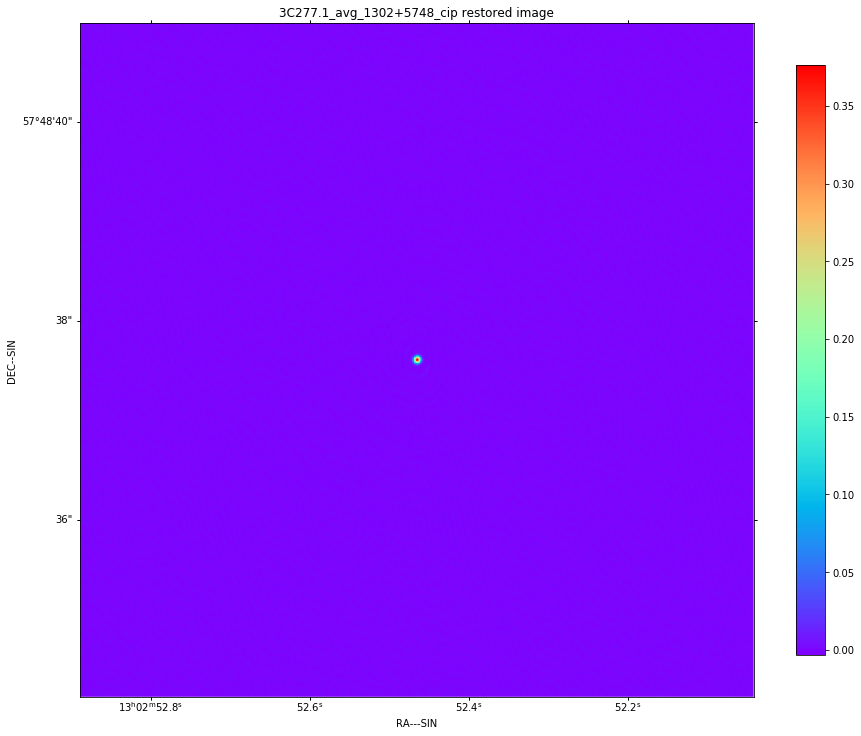

<Figure size 864x864 with 0 Axes>

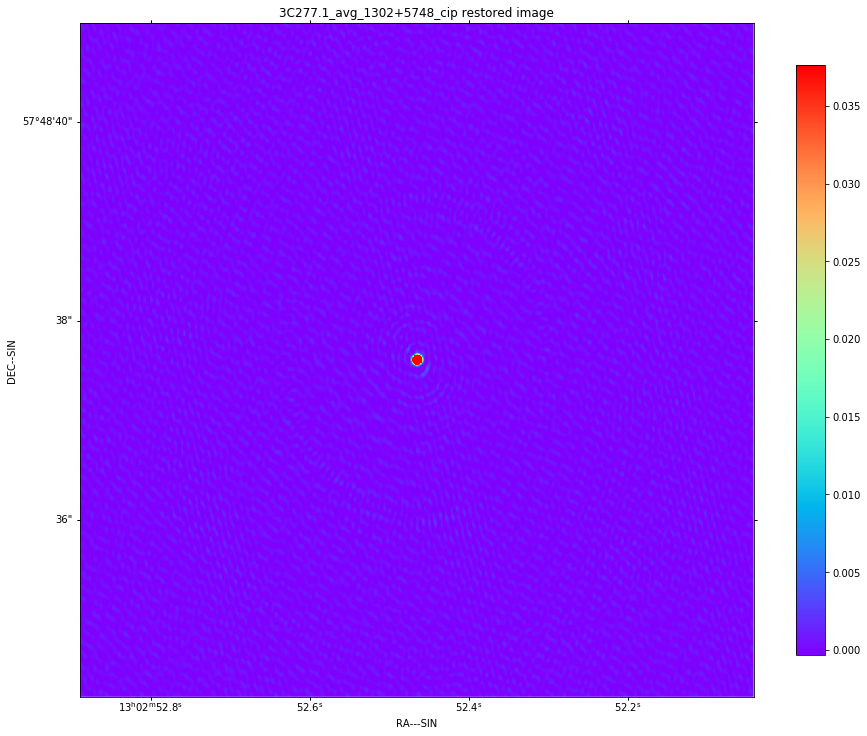



Processing 1302+5748 via ical pipeline




Quality assessment:
	Origin: qa_gaintable
	Context: None
	Data:
		shape: '(1056, 6, 4, 1, 1)'
		maxabs-amp: '1.0'
		minabs-amp: '0.9999990501184924'
		rms-amp: '2.751614375183767e-08'
		medianabs-amp: '1.0'
		maxabs-phase: '0.7972330181399995'
		minabs-phase: '-1.7496076702972823'
		rms-phase: '0.04941445604222568'
		medianabs-phase: '0.0'
		residual: '1.1358043416413415'



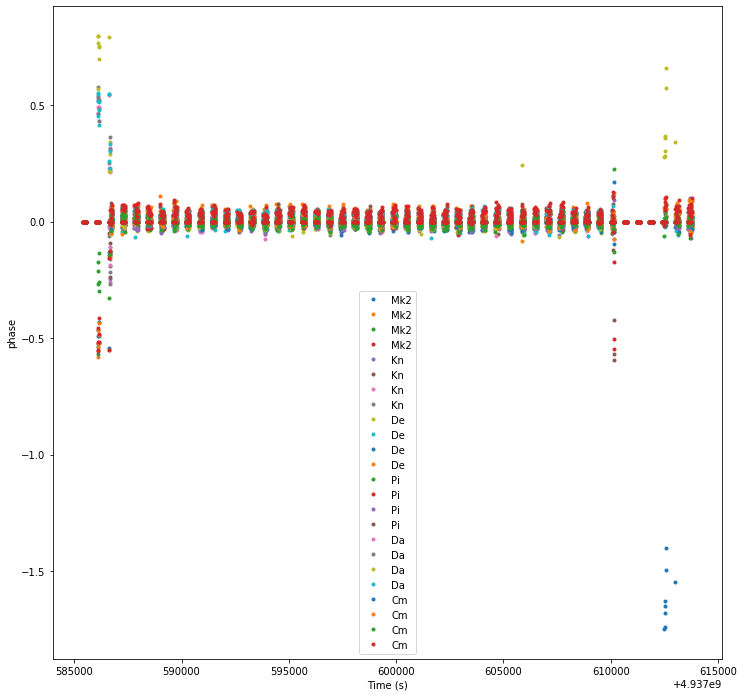

Quality assessment:
	Origin: qa_gaintable
	Context: None
	Data:
		shape: '(8, 6, 4, 1, 1)'
		maxabs-amp: '1.2900319024645237'
		minabs-amp: '0.9396533249082859'
		rms-amp: '0.06841545503899202'
		medianabs-amp: '1.0037299208859145'
		maxabs-phase: '0.15774274786491224'
		minabs-phase: '-0.22523924796459271'
		rms-phase: '0.03358719533573554'
		medianabs-phase: '-1.0063778794271964e-25'
		residual: '0.06935515855204426'



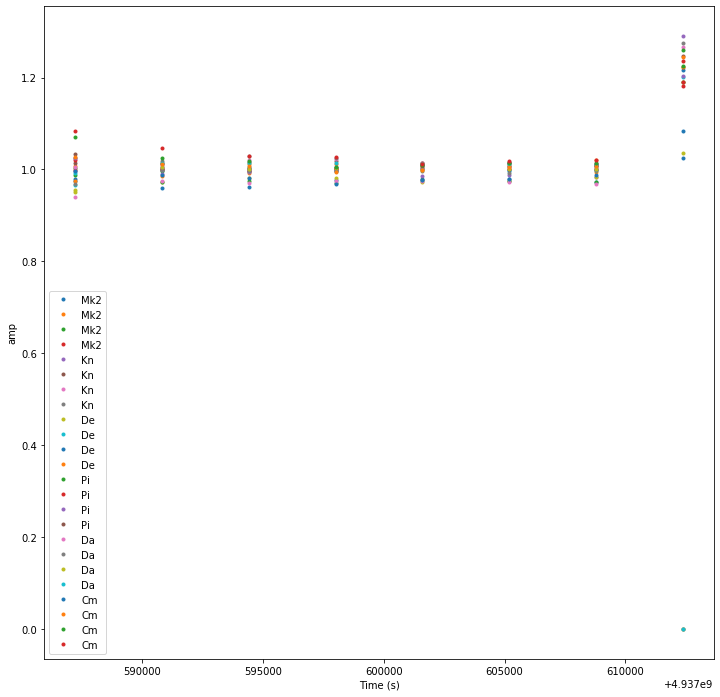

Quality assessment:
	Origin: qa_image
	Context: Deconvolved image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.0661731967519911'
		min: '-0.0036666822611447687'
		maxabs: '0.0661731967519911'
		rms: '9.744017826653916e-05'
		sum: '0.3810262236701105'
		medianabs: '0.0'
		medianabsdevmedian: '0.0'
		median: '0.0'



<Figure size 864x864 with 0 Axes>

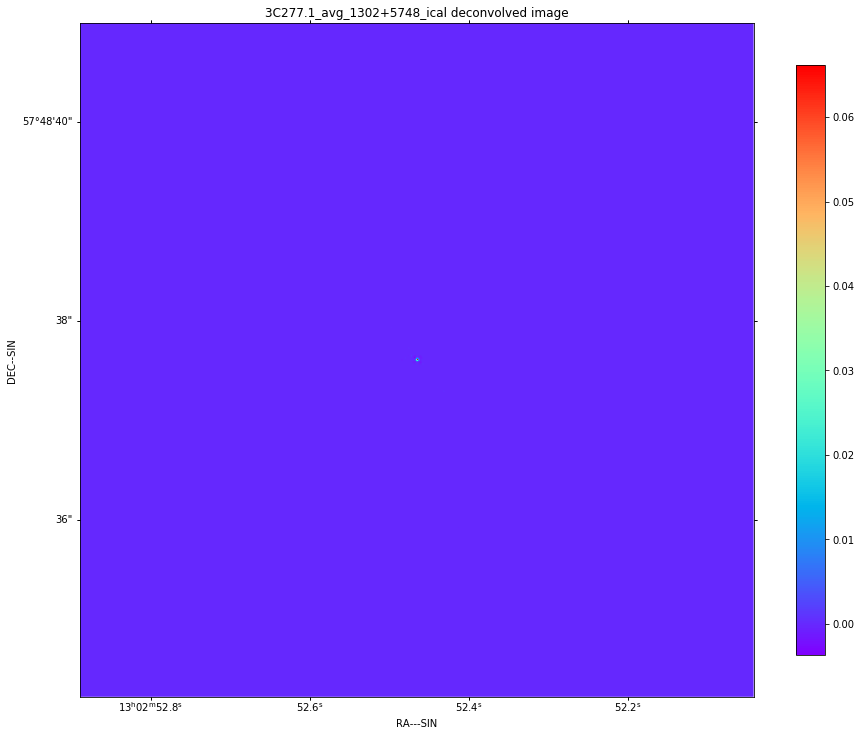

Quality assessment:
	Origin: qa_image
	Context: Residual image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.0023227049969136715'
		min: '-0.0025217141956090927'
		maxabs: '0.0025217141956090927'
		rms: '0.0005762078584552648'
		sum: '-0.1755590767005626'
		medianabs: '0.0003920938033843413'
		medianabsdevmedian: '0.00039212091451190645'
		median: '-1.0243975339108147e-06'



<Figure size 864x864 with 0 Axes>

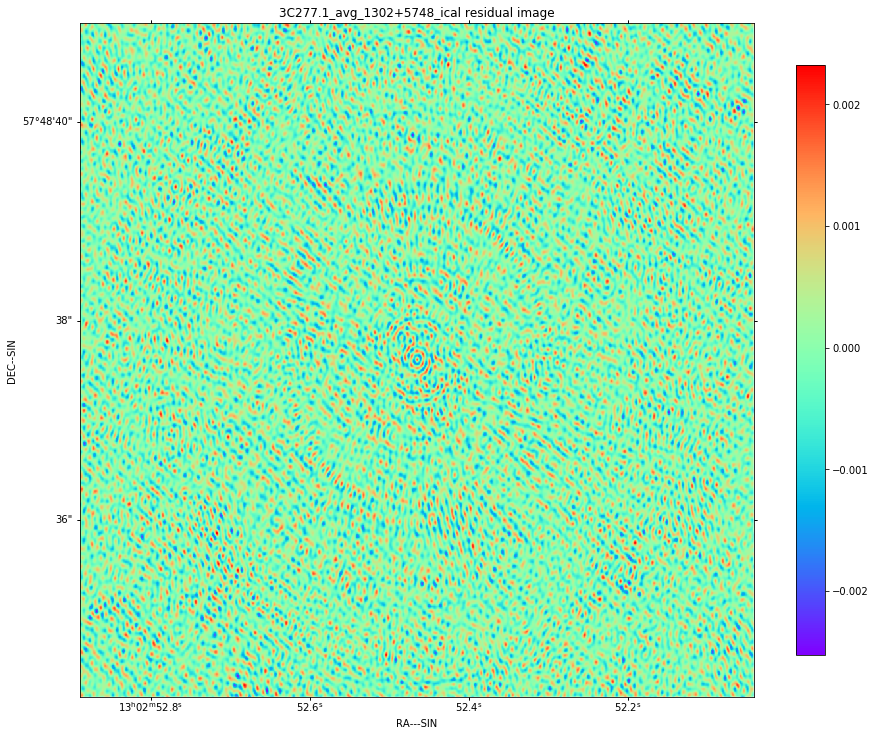

Quality assessment:
	Origin: qa_image
	Context: Restored image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.3712456891545485'
		min: '-0.0034316477943207033'
		maxabs: '0.3712456891545485'
		rms: '0.0023469335708059024'
		sum: '28.689765544368427'
		medianabs: '0.0003930972452508286'
		medianabsdevmedian: '0.0003930625811593055'
		median: '-5.787404688817983e-07'



<Figure size 864x864 with 0 Axes>

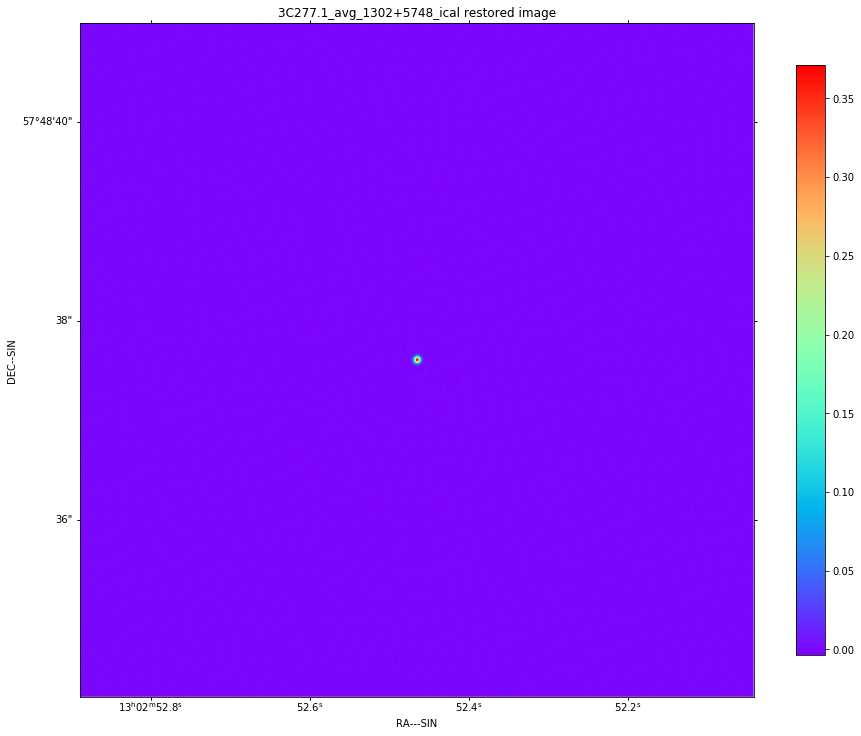

<Figure size 864x864 with 0 Axes>

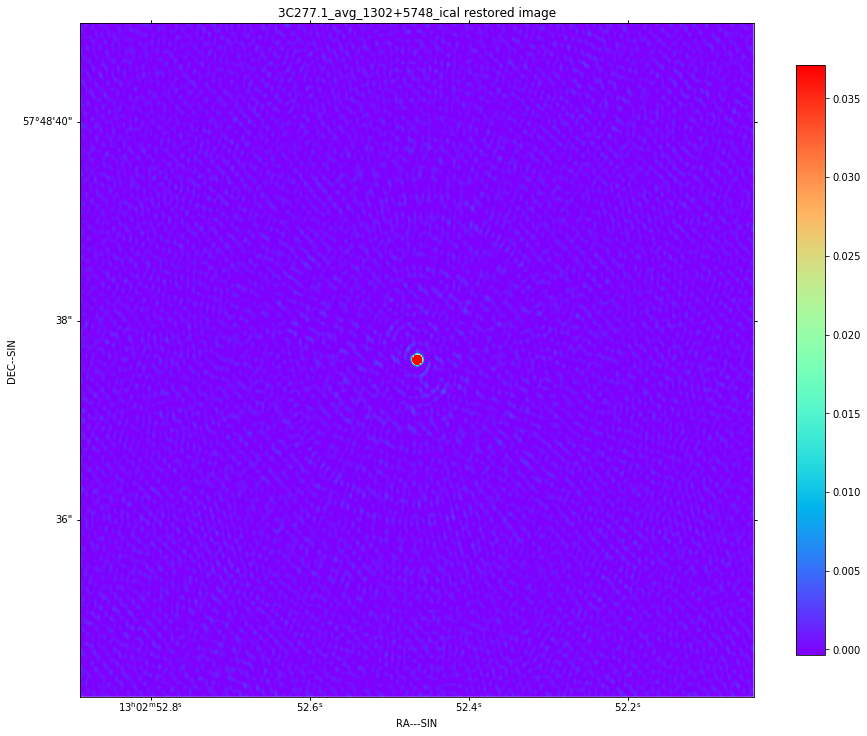



Processing 1252+5634 via cip pipeline


Quality assessment:
	Origin: qa_image
	Context: Deconvolved image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.006621897863730813'
		min: '-0.00031618200578566657'
		maxabs: '0.006621897863730813'
		rms: '2.4861857579244273e-05'
		sum: '0.3492873212169693'
		medianabs: '0.0'
		medianabsdevmedian: '0.0'
		median: '0.0'



<Figure size 864x864 with 0 Axes>

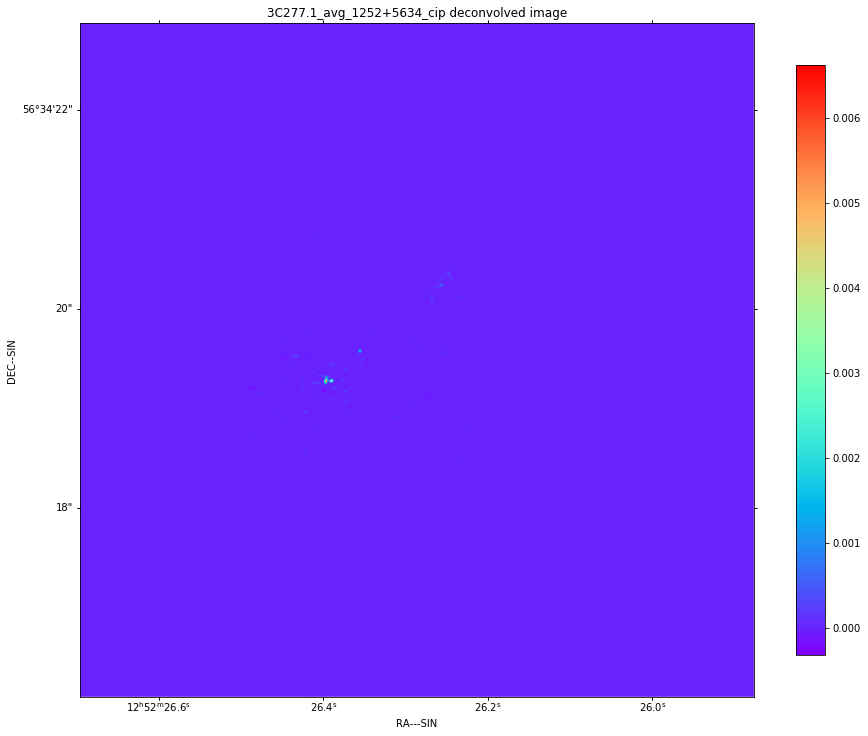

Quality assessment:
	Origin: qa_image
	Context: Residual image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.0033478401601314545'
		min: '-0.003038533264771104'
		maxabs: '0.0033478401601314545'
		rms: '0.000624530455218723'
		sum: '-1.1542993815581826'
		medianabs: '0.0004062767402501777'
		medianabsdevmedian: '0.0004061153158545494'
		median: '-7.227471314763534e-06'



<Figure size 864x864 with 0 Axes>

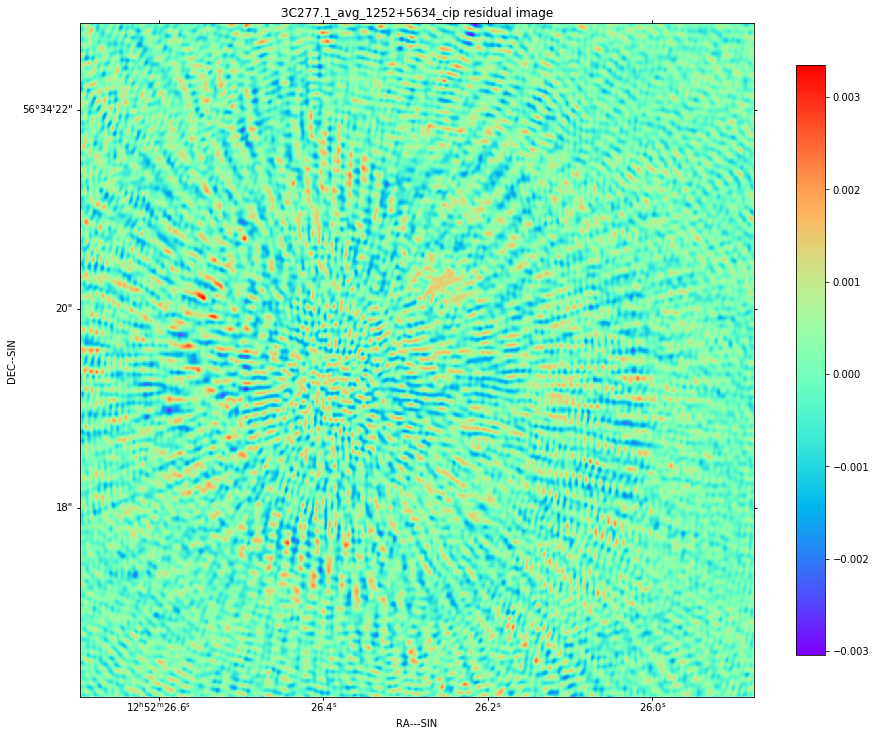

Quality assessment:
	Origin: qa_image
	Context: Restored image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.11536439162721777'
		min: '-0.006627820075063864'
		maxabs: '0.11536439162721777'
		rms: '0.0011609412925901558'
		sum: '23.432860386154726'
		medianabs: '0.00040929281385615457'
		medianabsdevmedian: '0.00040923058850239613'
		median: '-5.995215815346462e-06'



<Figure size 864x864 with 0 Axes>

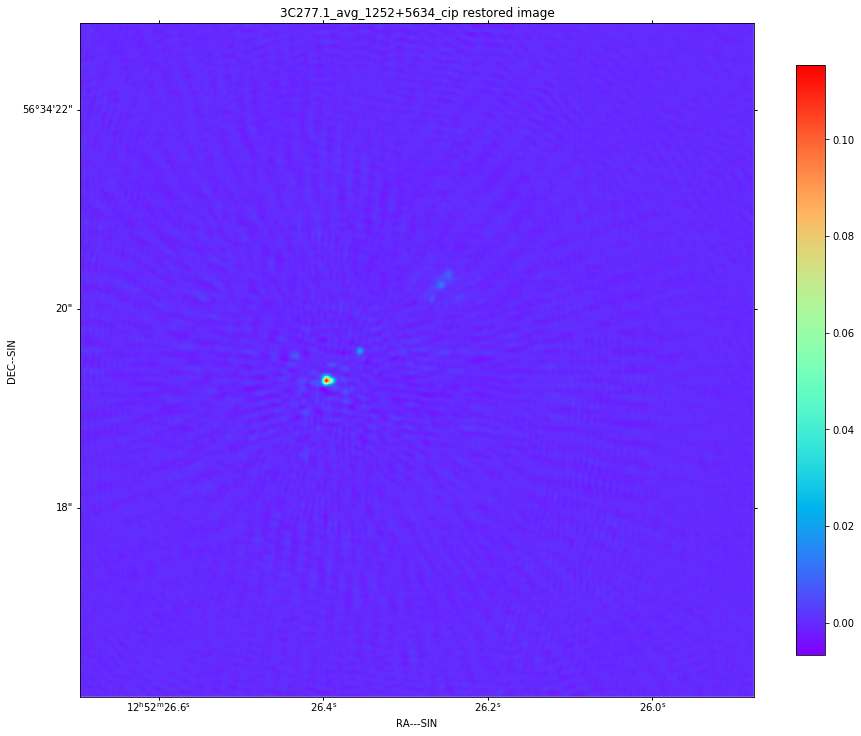

<Figure size 864x864 with 0 Axes>

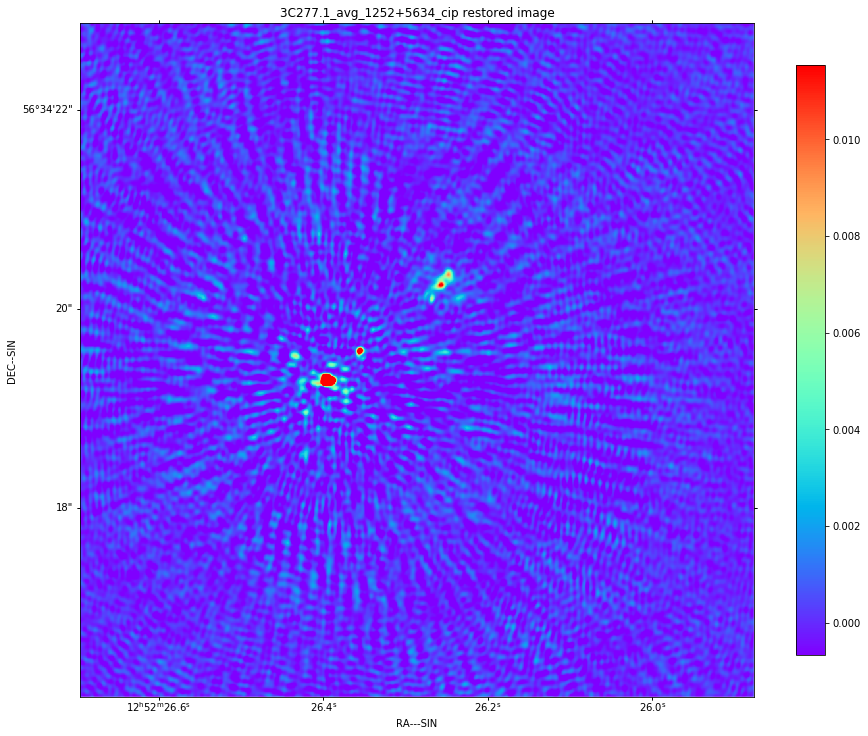



Processing 1252+5634 via ical pipeline


Quality assessment:
	Origin: qa_gaintable
	Context: None
	Data:
		shape: '(2498, 6, 4, 1, 1)'
		maxabs-amp: '1.0'
		minabs-amp: '0.9987015416475857'
		rms-amp: '5.8823090206592e-06'
		medianabs-amp: '0.9999999999873727'
		maxabs-phase: '3.1338647894873204'
		minabs-phase: '-3.1414622465036657'
		rms-phase: '0.46081515442698684'
		medianabs-phase: '0.0'
		residual: '1.847619354374905'



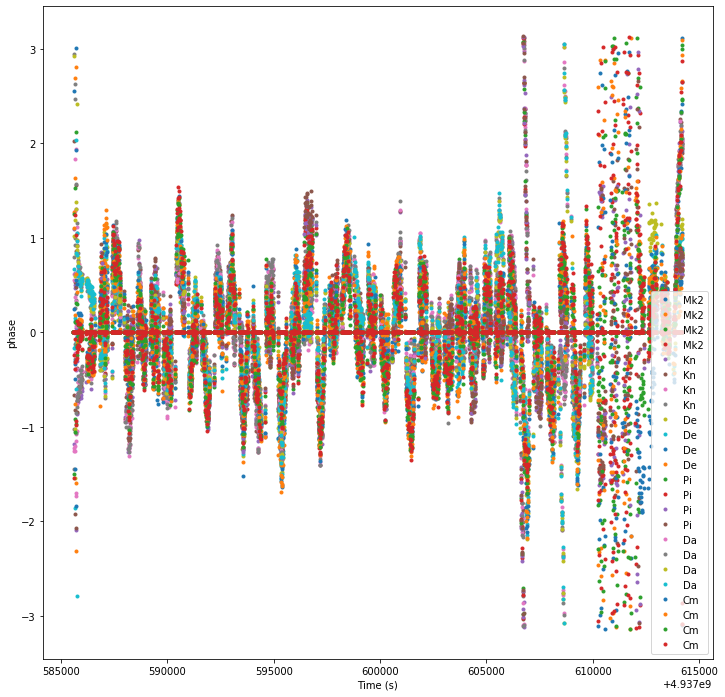

Quality assessment:
	Origin: qa_gaintable
	Context: None
	Data:
		shape: '(8, 6, 4, 1, 1)'
		maxabs-amp: '1.466984298053319'
		minabs-amp: '0.8433268936501226'
		rms-amp: '0.09793996031355666'
		medianabs-amp: '1.0032695149442712'
		maxabs-phase: '1.2885153542801033'
		minabs-phase: '-0.44739482347416154'
		rms-phase: '0.22289485325492903'
		medianabs-phase: '1.9070230622278484e-24'
		residual: '0.1322333986725404'



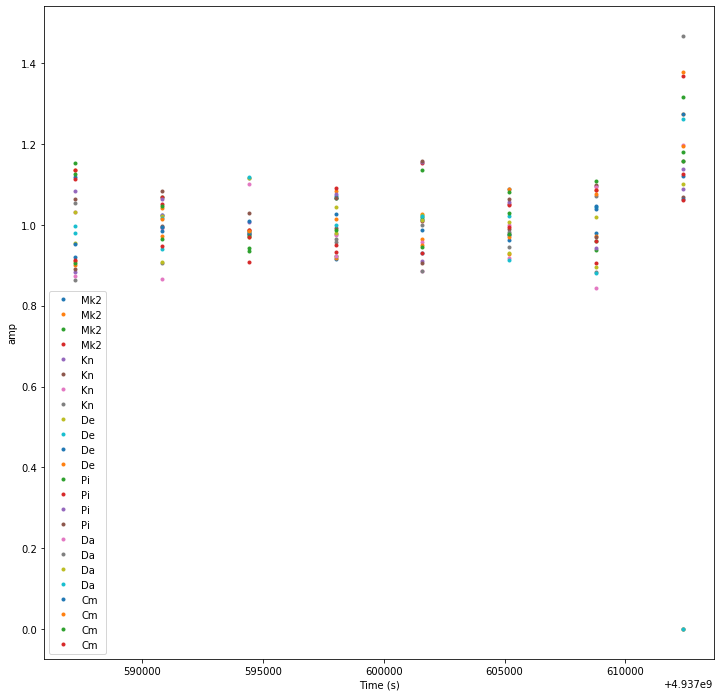

Quality assessment:
	Origin: qa_image
	Context: Deconvolved image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.007111601569706108'
		min: '-0.00032504549579513963'
		maxabs: '0.007111601569706108'
		rms: '2.6488458700520866e-05'
		sum: '0.38097624058054447'
		medianabs: '0.0'
		medianabsdevmedian: '0.0'
		median: '0.0'



<Figure size 864x864 with 0 Axes>

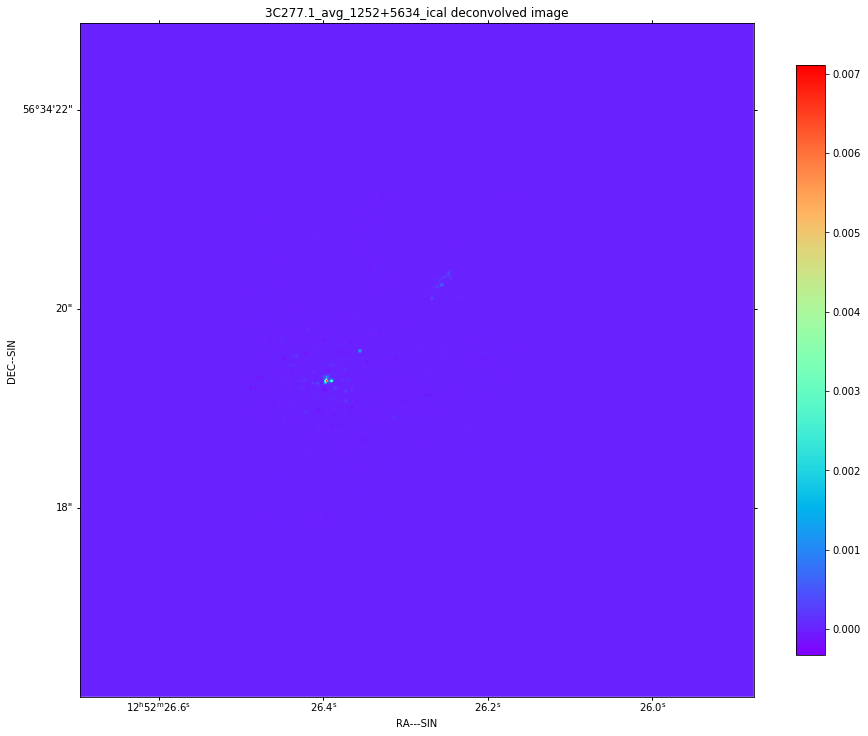

Quality assessment:
	Origin: qa_image
	Context: Residual image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.002268798416480422'
		min: '-0.0025656851939857006'
		maxabs: '0.0025656851939857006'
		rms: '0.000499161507389116'
		sum: '-0.7586842035851651'
		medianabs: '0.00032432624720968306'
		medianabsdevmedian: '0.00032436441688332707'
		median: '-3.814473870988877e-06'



<Figure size 864x864 with 0 Axes>

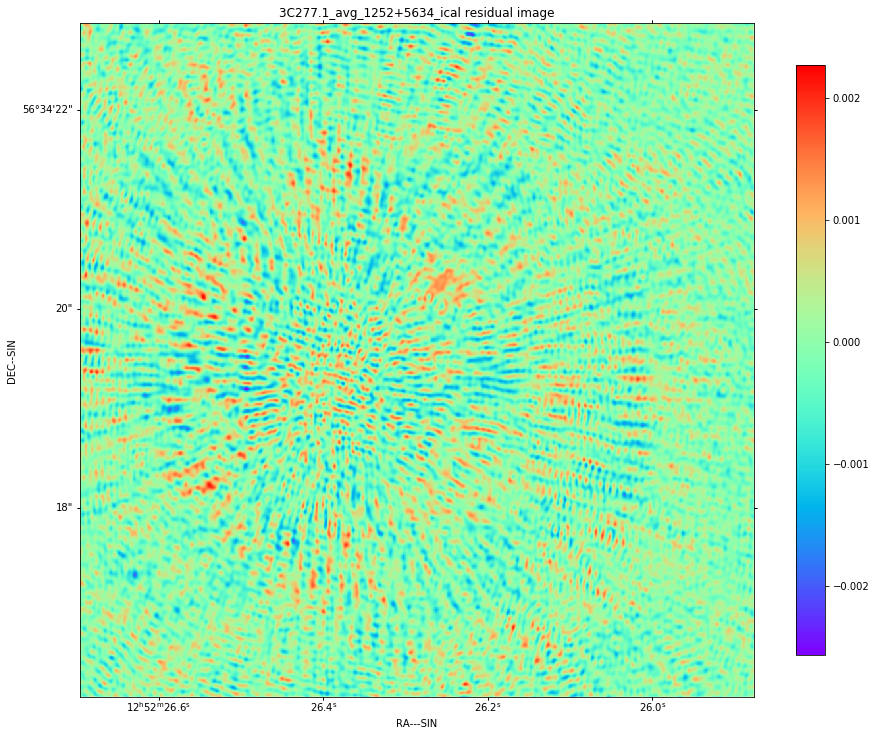

Quality assessment:
	Origin: qa_image
	Context: Restored image
	Data:
		shape: '(1, 1, 1024, 1024)'
		max: '0.12462427666737343'
		min: '-0.0038906440301091695'
		maxabs: '0.12462427666737343'
		rms: '0.0011585031866728531'
		sum: '26.059133466463713'
		medianabs: '0.0003273607144631329'
		medianabsdevmedian: '0.00032729084358874806'
		median: '-3.2244062140308827e-06'



<Figure size 864x864 with 0 Axes>

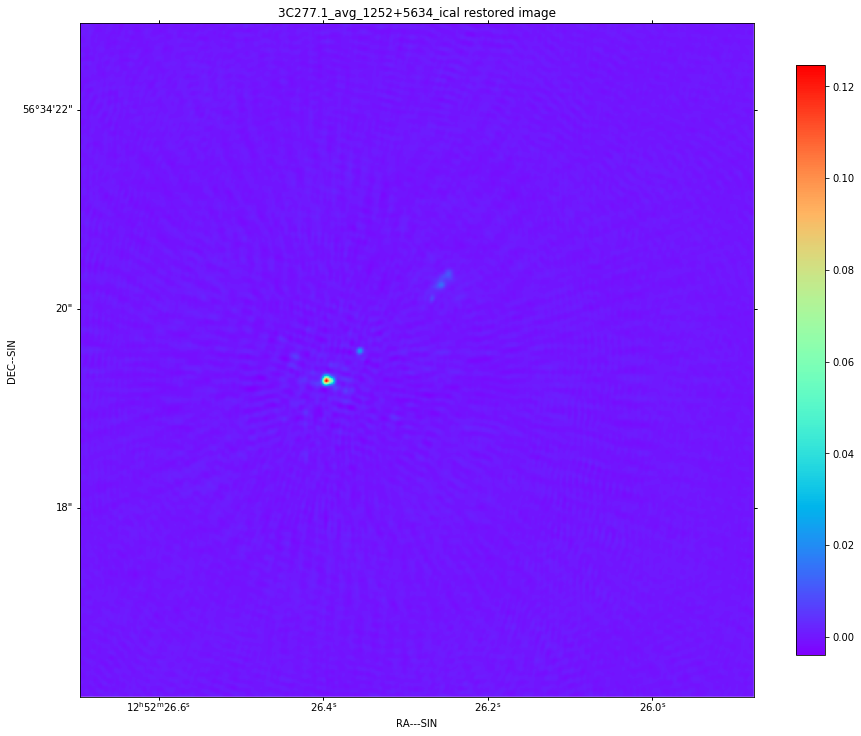

<Figure size 864x864 with 0 Axes>

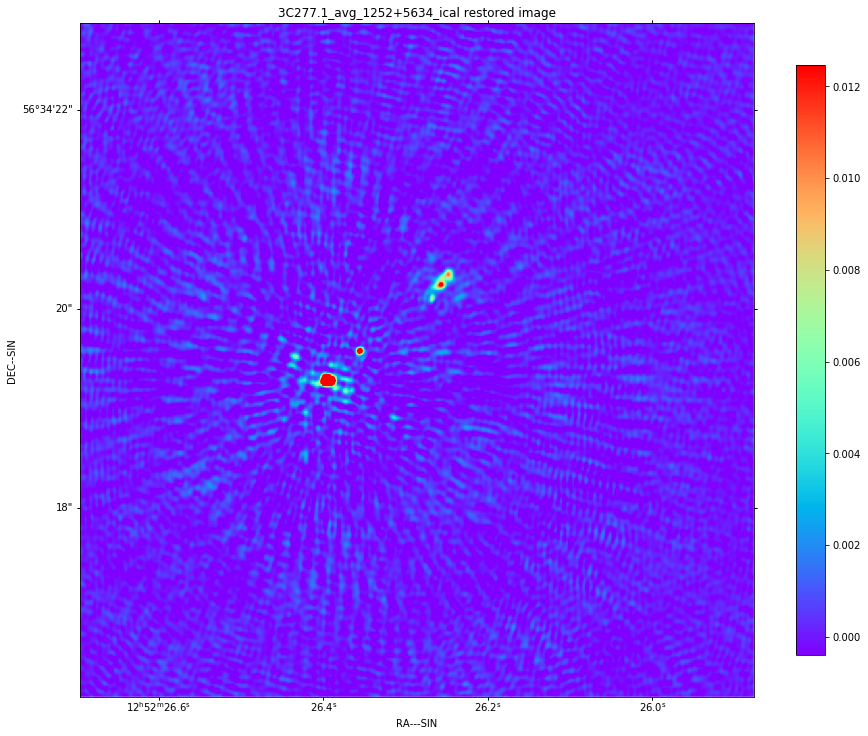

In [11]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['image.cmap'] = 'rainbow'

from processing_components.imaging.ng import invert_ng
from processing_components.visibility.operations import convert_blockvisibility_to_stokesI
from processing_components.visibility.coalesce import convert_blockvisibility_to_visibility, \
    convert_visibility_to_blockvisibility
from processing_components.imaging.weighting import weight_visibility
from processing_components.imaging.base import create_image_from_visibility
from workflows.serial.pipelines.pipeline_serial import continuum_imaging_list_serial_workflow, \
    ical_list_serial_workflow
from processing_components.imaging.base import advise_wide_field
from processing_components.calibration.calibration_control import create_calibration_controls
from processing_components.calibration.operations import gaintable_plot

advice = advise_wide_field(avis_list[0], verbose=False)
for svis in blockvis:
    frequency = [numpy.mean(svis.frequency)]
    channel_bandwidth = [numpy.sum(svis.channel_bandwidth)]
    ivis = convert_blockvisibility_to_stokesI(svis)
    model = create_image_from_visibility(ivis, npixel=1024, cellsize=advice['cellsize']/3.0, nchan=1,
                                         frequency=frequency, channel_bandwidth=channel_bandwidth)
    cvis = convert_blockvisibility_to_visibility(ivis)
    cvis = weight_visibility(cvis, model)
    ivis = convert_visibility_to_blockvisibility(cvis)
    
    for mode in ["cip", "ical"]:
        
        print("\n")
        print("Processing {source:s} via {mode:s} pipeline".format(source=svis.source, mode=mode))
        print("\n")

        filename_root = "3C277.1_avg_{source:s}_{mode:s}".format(source=svis.source, mode=mode)

        if mode == "ical":
            controls = create_calibration_controls()
            controls['T']['first_selfcal'] = 1
            controls['T']['phase_only'] = True
            controls['T']['timeslice'] = 3.0
            controls['G']['first_selfcal'] = 10
            controls['G']['phase_only'] = False
            controls['G']['timeslice'] = 3600.0


            deconvolved, residual, restored, gt_list = ical_list_serial_workflow([ivis], [model],
                                                                                 context='ng',
                                                                                 nmajor=15,
                                                                                 niter=1000, algorithm='msclean',
                                                                                 scales=[0, 3, 10], gain=0.1,
                                                                                 fractional_threshold=0.5,
                                                                                 threshold=0.0015,
                                                                                 window_shape='quarter',
                                                                                 do_wstacking=False,
                                                                                 global_solution=False,
                                                                                 calibration_context='TG',
                                                                                 do_selfcal=True,
                                                                                 controls=controls)
            deconvolved = deconvolved[0]
            residual = residual[0][0]
            restored = restored[0]
            gt = gt_list[0]['T']
            print(qa_gaintable(gt))
            fig, ax = plt.subplots(1,1)
            gaintable_plot(gt, ax, value='phase')
            plt.show(block=False)

            gt = gt_list[0]['G']
            print(qa_gaintable(gt))
            fig, ax = plt.subplots(1,1)
            gaintable_plot(gt, ax, value='amp')
            plt.show(block=False)


        elif mode == "cip":
            deconvolved, residual, restored = continuum_imaging_list_serial_workflow([ivis], [model], context='ng',
                                                                                     nmajor=10,
                                                                                     niter=1000, algorithm='msclean',
                                                                                     scales=[0, 3, 10], gain=0.1,
                                                                                     fractional_threshold=0.5,
                                                                                     threshold=0.0015,
                                                                                     window_shape='quarter',
                                                                                     do_wstacking=False)

            deconvolved = deconvolved[0]
            residual = residual[0][0]
            restored = restored[0]

        else:
            mode = "invert"
            dirty, sumwt = invert_ng(ivis, model, do_wstacking=False)
            print(sumwt)
            plt.clf()
            show_image(dirty, title=svis.source + " Dirty image", cm="rainbow")
            plt.show(block=False)

            psf, sumwt = invert_ng(ivis, model, do_wstacking=False, dopsf=True)
            plt.clf()
            show_image(psf, title=svis.source + " PSF", cm="rainbow")
            plt.show(block=False)

            from processing_components.image.deconvolution import deconvolve_cube, restore_cube

            deconvolved, residual = deconvolve_cube(dirty, psf, niter=1000, algorithm='msclean',
                                                    fractional_threshold=0.5,
                                                    scales=[0, 3, 10], gain=0.1, threshold=0.003,
                                                    window_shape='quarter')
            restored = restore_cube(deconvolved, psf, residual)

        print(qa_image(deconvolved, context='Deconvolved image'))
        plt.clf()
        show_image(deconvolved, title=filename_root + " deconvolved image", cm="rainbow")
        plt.tight_layout()
        plt.show(block=False)
        filename = "{root:s}_deconvolved.fits".format(root=filename_root)
        export_image_to_fits(deconvolved, filename)


        print(qa_image(residual, context='Residual image'))
        plt.clf()
        show_image(residual, title=filename_root + " residual image", cm="rainbow")
        plt.tight_layout()
        plt.show(block=False)
        filename = "{root:s}_residual.fits".format(root=filename_root)
        export_image_to_fits(residual, filename)


        print(qa_image(restored, context='Restored image'))
        plt.clf()
        show_image(restored, title=filename_root + " restored image", cm="rainbow")
        plt.tight_layout()
        plt.show(block=False)        

        plt.clf()
        show_image(restored, title=filename_root + " restored image", vscale=0.1, cm="rainbow")
        plt.tight_layout()
        plt.show(block=False)        

        filename = "{root:s}_restored.fits".format(root=filename_root)
        export_image_to_fits(restored, filename)
    